In [32]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random as ran



In [33]:
from google.colab import output
output.enable_custom_widget_manager()

# Punto 1


Text(0.5, 1.0, 'Derivada exacta')

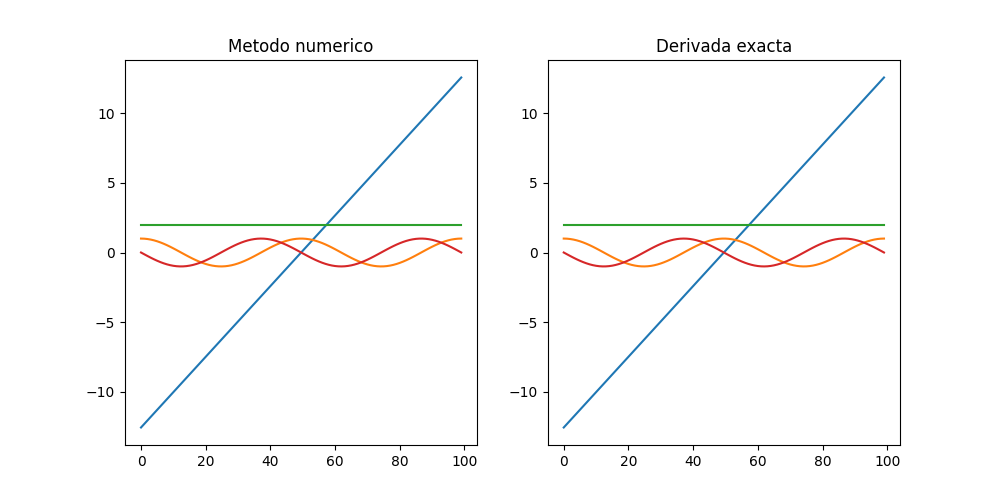

In [34]:
fig3, ax=plt.subplots(1,2)
fig3.set_size_inches(10,5)
def p_derivada(f,x,h=0.001):
  return (-f(x+2*h)+4*f(x+h)-3*f(x))/(2*h)

def s_derivada(f,x,h=0.001):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

cuadrado= lambda x : x**2
seno= lambda x : np.sin(x)
dcuadrado= lambda x : 2*x
dseno= lambda x : np.cos(x)
d2cuadrado= lambda x : 2*(x**0)
d2seno= lambda x : -np.sin(x)

x=np.linspace(-2*np.pi,2*np.pi,100)


ax[0].plot(dcuadrado(x))
ax[0].plot(dseno(x))
ax[0].plot(d2cuadrado(x))
ax[0].plot(d2seno(x))
ax[0].set_title("Metodo numerico")

ax[1].plot(p_derivada(cuadrado,x))
ax[1].plot(p_derivada(seno,x))
ax[1].plot(s_derivada(cuadrado,x))
ax[1].plot(s_derivada(seno,x))
ax[1].set_title("Derivada exacta")


## Punto 2

In [35]:
class Particle:

    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):

        self.dt = t[1] - t[0]


        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0

        self.m = m
        self.radius = radius
        self.Id = Id


        self.p = self.m*self.v

        self.f = self.m*self.a
        self.mgh = 0
        self.l=np.cross(self.r,self.p)
        # Historial

        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)

        self.F = np.zeros_like(self.R)

        self.P = np.zeros_like(self.R)



        # Fisica
        self.K = 20.

        self.VEk = np.zeros(len(t))
        self.MGH = np.zeros(len(t))
        self.L = np.zeros(len(t))

    def Evolution(self,i):


        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAngular(i)
        self.a = self.f/self.m

        self.SetPotential(i)


        # Euler no conserva la energia
        #self.r += self.dt*self.v
        #self.v += self.dt*self.a

        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v



    def CalculateForce(self,p):

        d = np.linalg.norm(self.r - p.r)

        compresion = self.radius + p.radius - d

        if compresion >= 0:

            Fn = self.K * compresion**3

            self.n = (self.r - p.r)/d
            self.f = np.add(self.f,Fn*self.n)

            # Falta implementar energía potencial
            self.mgh= (self.K* (compresion)**4)/4



    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.

    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    def SetPotential(self,i):
        self.MGH[i] = self.mgh
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.p=self.m*self.v
        self.P[i] = self.p
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    def SetAngular(self,i):

        self.L[i]=np.cross(self.r,self.p)

    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetMomentum(self,scale=1):
        return self.P[::scale]

    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale]


ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ef81bf436a0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 919, in _run
    val = self.callback()
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/backend_bases.py", line 1226, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py", line 1426, in _step
    still_going = super()._step(*args)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py", line 1119, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py", line 1138, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py", line 1767, in _draw_frame
    self._drawn_artists = self._func(fra

In [36]:

def GetParticles(N,t):
    Particles = []
    for i in range(N):
        xa = 20*ran.uniform(-1,1)
        ya = 20*ran.uniform(-1,1)
        r0 = np.array([xa,ya])
        vxa = 5*ran.uniform(-1,1)
        vya = 5*ran.uniform(-1,1)
        v0 = np.array([vxa,vya])
        a0 = np.array([0.,0.])
        p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=i)
        Particles.append(p0)
        p0=0

    return Particles

In [37]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles_ = GetParticles(10,t)

In [38]:
def RunSimulation(t,Particles):

    for it in range(len(t)):

        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])

        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()

    return Particles

In [39]:
Particles = RunSimulation(t,Particles_)

In [40]:
scale = 200
t1 = t[::scale]

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


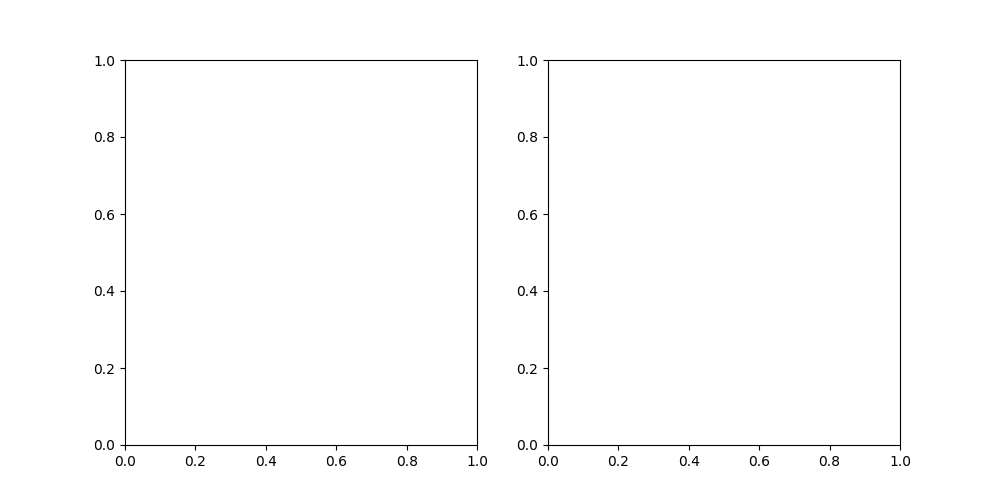

In [41]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():

    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)

def Update(i):

    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))


    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy

    for p in Particles:

        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]

        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]

        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)

        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)

        KE += p.GetKineticEnergy(scale)[i]

        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

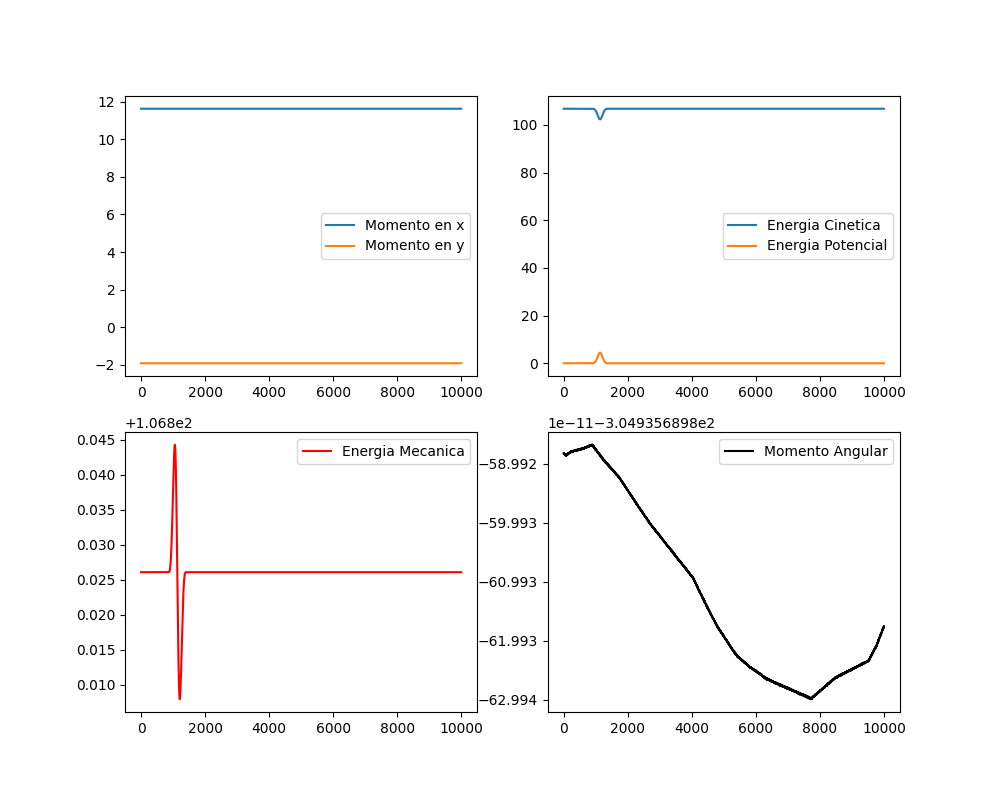

In [42]:
fig_punto2, ax_=plt.subplots(2,2)
fig_punto2.set_size_inches(10,8)
momentox=0
momentoy=0
kinetic=0
Potential=0
Angular2=0
for i in Particles_:
   momentox+=i.P[:,0]
   momentoy+=i.P[:,1]
   kinetic+=i.VEk
   Potential+=i.MGH
   Angular2+=i.L


ax_[0,0].plot(momentox,label="Momento en x")
ax_[0,0].plot(momentoy,label="Momento en y")
ax_[0,0].legend()
ax_[0,1].plot(kinetic, label="Energia Cinetica")
ax_[0,1].plot(Potential/2,label="Energia Potencial")
ax_[1,0].plot((Potential/2)+kinetic,label="Energia Mecanica",color="r")
ax_[0,1].legend()
ax_[1,0].legend()
ax_[1,1].plot(Angular2,label="Momento Angular",color="k")
ax_[1,1].legend()



Respuestas.

a,b) El momento se deberia conservar, pues la fuerza que sienten las particulas al chocar es conservativa, lo que implica que la velocidad que pierde en el choque es recuperada inmediatamente despues de este.

c)
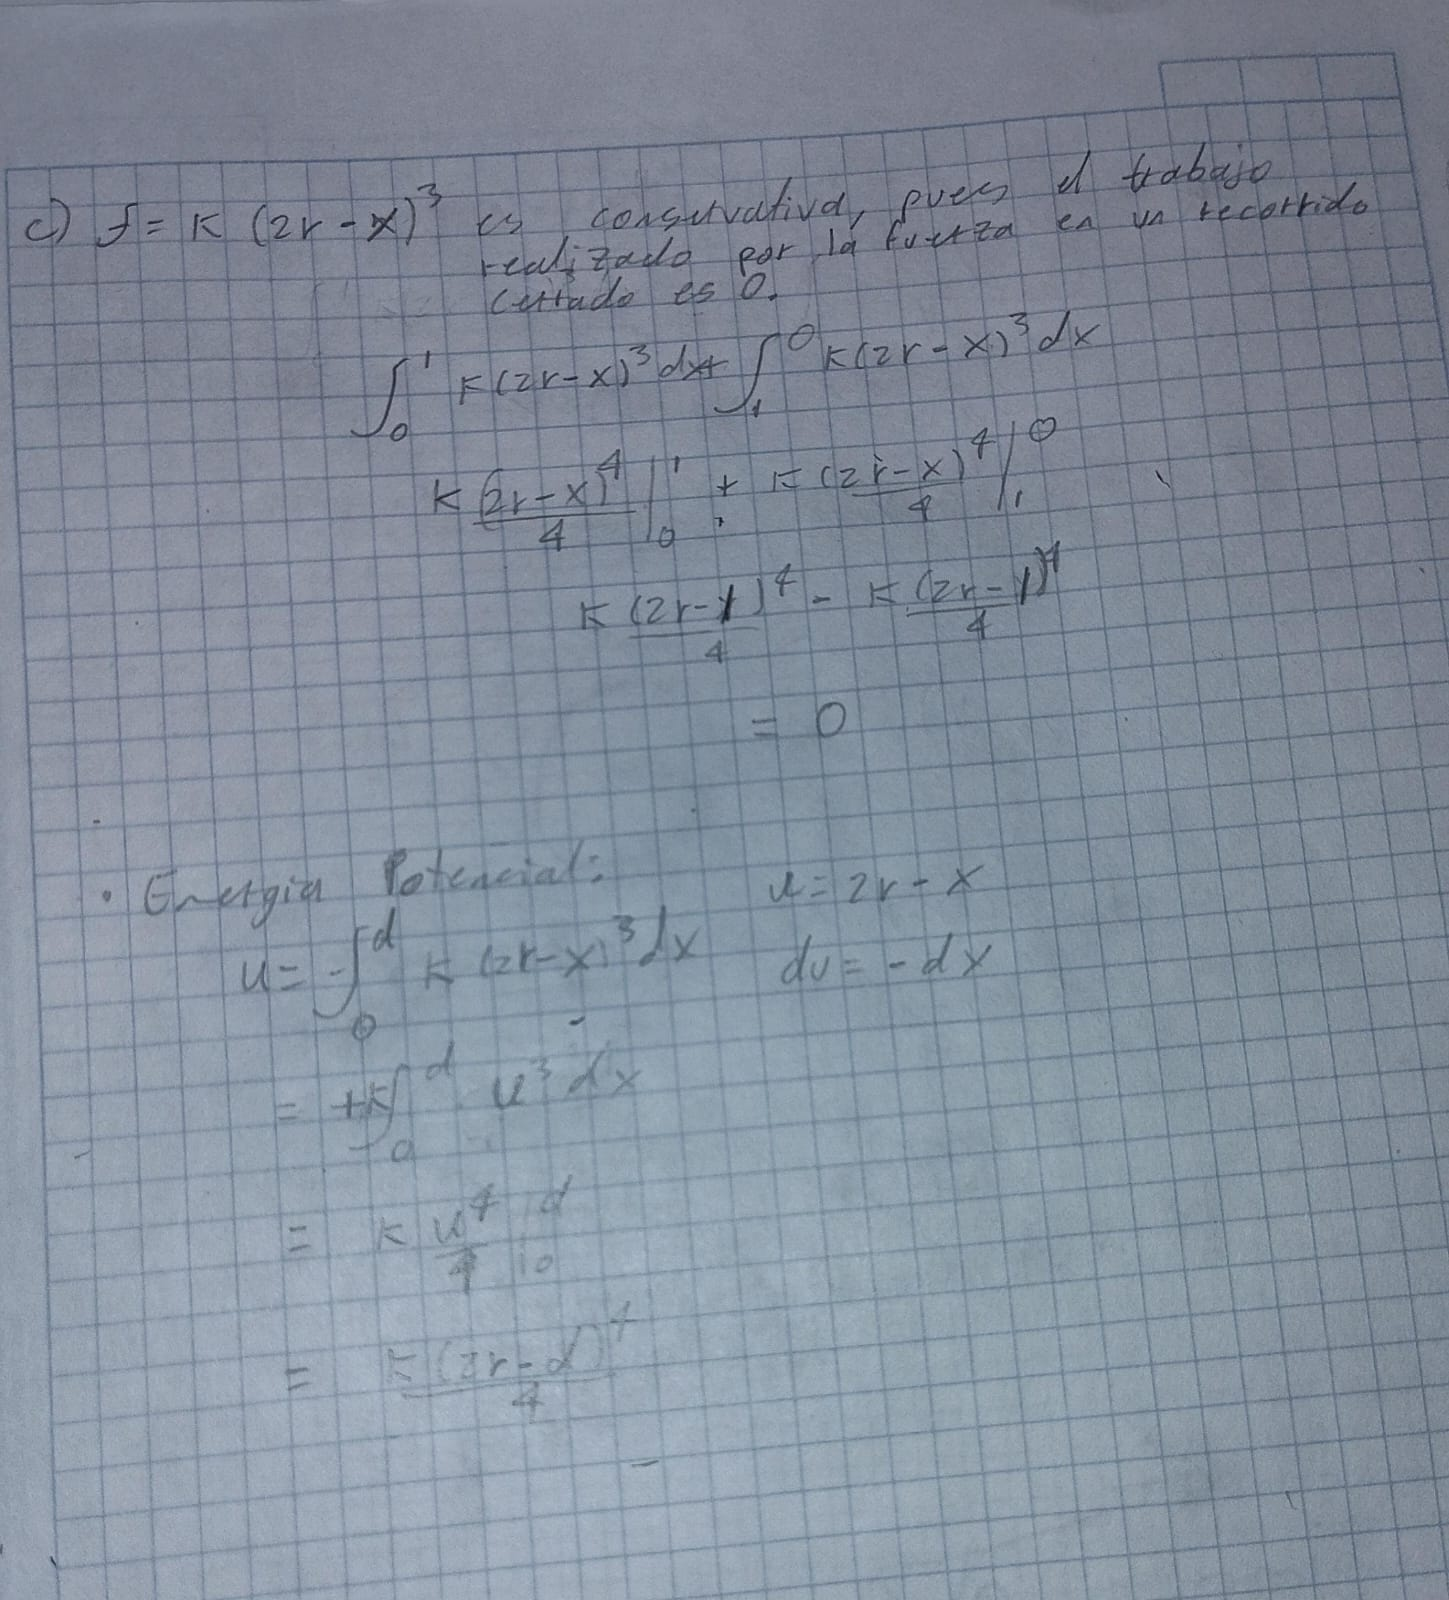


d) La energia cinetica es la misma siempre, a excepcion de los momentos en los que las particulas chocan. En dicho escenario la energia cinetica se convierte en energia potencial como podemos ver en las graficas.

e) Que la energia potencial sea positiva implica que se ha dado un choque entre las particulas de la simulacio.

f) Podemos ver en las graficas que en general la energia mecanica se conserva. Debidos a los errores del metodo de euler se logran ver algunas inconsistencias. Sin embargo, son tan pequeñas que podemos considerarlas despreciables.

g) El momento angular se conserva, lo que se puede verificar en la grafica. Las variaciones que se perciben son producto del error del metodo y la escalada del eje y.

i) Si este sistema que se mueve en 2D se extendiera a 3D y no se dota a las particulas de un momento en el eje z, estas se moveran solo en el plano x,y.

# Punto 3

In [43]:
#Velocidad de la luz en m/s
v_luz= 3e8
#unidad astronomica en metros
au = 1.496e11
#Cantidad de segundos en un año
año= 86400*365

V_luz_gausssystem= v_luz*año/au
print(V_luz_gausssystem)

63240.641711229946
